In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from scripts import project_functions
import matplotlib.pyplot as plt
data = "https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv"
df = project_functions.load_and_process(data)
df

,Age,Sex,BMI,Children,Smoker,Region,Charges,Body Shape
0,54,female,47.4,0,yes,Southeast,63770,Class 3 Obesity
1,45,male,30.4,0,yes,Southeast,62592,Class 1 Obesity
2,52,male,34.5,3,yes,Northwest,60021,Class 2 Obesity
3,31,female,38.1,1,yes,Northeast,58571,Class 3 Obesity
4,33,female,35.5,0,yes,Northwest,55135,Class 2 Obesity
...,...,...,...,...,...,...,...,...
1333,18,male,34.1,0,no,Southeast,1137,Class 2 Obesity
1334,18,male,33.7,0,no,Southeast,1136,Class 2 Obesity
1335,18,male,33.3,0,no,Southeast,1135,Class 2 Obesity
1336,18,male,30.1,0,no,Southeast,1131,Class 1 Obesity


**The following analysis will attempt to answer four research questions.** 
1. **Are there any relevant correlation between the ratio of multiple quantitative variables; such as age/bmi vs charges/children?** 
2. **Is there a region with a greater average age that also results in higher average charges?**
3. **What is the most dominant variable in determining the costs of insurance charges?**

---

**Finiding a BMI / Age Correlation:**

In [123]:
ages = [
    (df['Age'] >= 18) & (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 50),
    (df['Age'] >= 50) & (df['Age'] < 65)
]
values = ['18 - 30', '30 - 40', '40 - 50', '50 - 65']
#To be used in future

Text(0.5, 1.0, 'BMI to Age Regression Model')

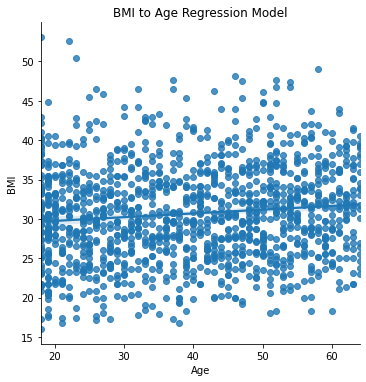

In [134]:
sns.lmplot(x="Age", y="BMI", data=df)
plt.title('BMI to Age Regression Model')

Text(0.5, 1.0, 'Correlation Between Age Groups and BMI')

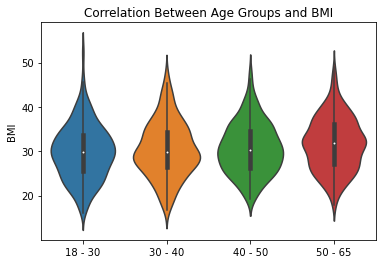

In [133]:
sns.violinplot(x=np.select(ages,values), y='BMI', data=df, order=['18 - 30', '30 - 40', '40 - 50', '50 - 65'])
plt.title('Correlation Between Age Groups and BMI')

*Unfortunately, we cannot determine a very strong correlation between age and BMI. The individuals with the extremely higher BMI's are seen mostly in the 18-30 age range as we can see from the extended tip at the top. But, it is also home to the lowest BMI individuals as well. Most individuals are sitting right around 30, as depicted by the thicker parts of the violin, although we can see a slightly larger bump towards 32-34 in the age range 50-65. Overall, there is not a definitive positive correlation seen between age and BMI.*

---

**Finding a correlation between the number of children and the average charge:**

In [29]:
df.groupby(by=["Children"]).mean()

,Age,BMI,Charges
Children,,,
0,38.444251,30.550697,12365.461672
1,39.453704,30.621605,12730.706790
2,39.445833,30.978750,15073.066667
3,41.566879,30.685350,15354.847134
4,39.000000,31.388000,13850.200000
5,35.611111,29.600000,8785.500000


Text(0.5, 1.0, 'How Does Number of Children Affect Medical Charges?')

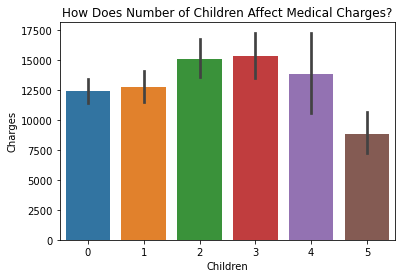

In [135]:
sns.barplot(x="Children", y="Charges", data=df)
plt.title('How Does Number of Children Affect Medical Charges?')

*Demonstrated by the data and visualization above we can see that indivivuals with 0,1,and 4 childern have close average charge of around 12500. The charges of of individuals with 2 and 3 childeren are significantly higher at around 15000. Finally, individuals with 5 children have a lower average charge of around 8000. While a certain number of children correlates with a higher or lower charge , it is not linear in the sense that less childern result in less charges or more childern result in more charges. This is quite interesting in the sense of why there is a general upward trend until the 4th and 5th children, and why the people with 5 children have the lowest charges. Thinking logically, there may be much less people with 4-5 children to draw a sample out of, so it may be a less accurate average than people with 0-3. If so, this makes this calculation unreliable because we do not have a large enough sample of people with >3 children to choose from.*

In [109]:
(df['Children'] >= 4).value_counts()

False    1295
True       43
Name: Children, dtype: int64

*As we predicted, the count of people who have >= 4 children is only ~3.2% of the population sampled (43:1295). This makes the data of people with >= 4 people quite unreliable, and thus, hard for us to accurately say or not if this leads to greater or lesser medical costs.*

In [111]:
df_children = df.groupby(by='Children').mean()
df_children

,Age,BMI,Charges
Children,,,
0,38.444251,30.550697,12365.461672
1,39.453704,30.621605,12730.706790
2,39.445833,30.978750,15073.066667
3,41.566879,30.685350,15354.847134
4,39.000000,31.388000,13850.200000
5,35.611111,29.600000,8785.500000


*Unsuspectedly, though, the people with 5 children have a much lower average age and BMI (which may also be correlated themselves), which may explain the lower cost of charges to a certain extent. We delve deeper into the question of if age and BMI are determining factors of costs below.*

---

**Region / Age - Cost Correlation**

In [74]:
dfbar=df.groupby(by=["Region"]).mean()
dfbar

,Age,BMI,Children,Charges
Region,,,,
Northeast,39.268519,29.173457,1.046296,13405.910494
Northwest,39.196923,29.200615,1.147692,12417.070769
Southeast,38.939560,33.354945,1.049451,14734.903846
Southwest,39.455385,30.596615,1.141538,12346.452308


<AxesSubplot:xlabel='Region', ylabel='Charges'>

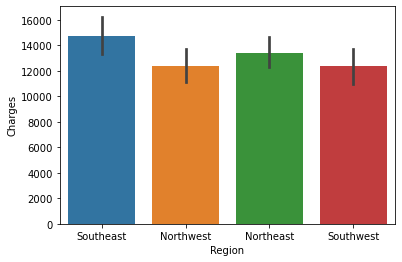

In [72]:
sns.barplot(x="Region", y="Charges", data=df)

Text(0.5, 1.0, 'Region to Age Group Medical Costs')

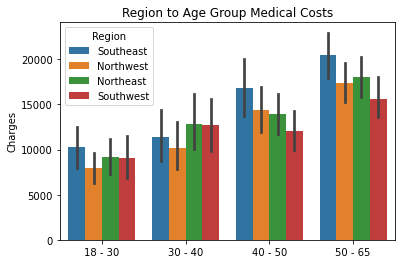

In [136]:
ages = [
    (df['Age'] >= 18) & (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 50),
    (df['Age'] >= 50) & (df['Age'] < 65)
]
values = ['18 - 30', '30 - 40', '40 - 50', '50 - 65']
sns.barplot(x=np.select(ages,values), y='Charges', hue='Region',data=df, order=['18 - 30', '30 - 40', '40 - 50', '50 - 65'])
plt.title('Region to Age Group Medical Costs')

*Using the top barplot, we can see that there isn't much difference between the average medical expenses per region, other than that the Southeast region comes in a bit higher than the other few, sitting just below 15000 dollars on average. But, when we look more specifically at age ranges, we find that as people get older, the Southeast region seems to take off from the other few regions, specifically ages 40+. This barplot is also interesting because regions aside, we find that age does indeed correlate to higher costs (as seen more clearly below).*

---

In [85]:
dfplot=df.groupby(by=["Age"]).mean()
dfplot

,BMI,Children,Charges
Age,,,
18,31.330435,0.449275,7085.710145
19,28.597059,0.426471,9747.367647
20,30.627586,0.862069,10159.241379
21,28.182143,0.785714,4730.000000
22,31.089286,0.714286,10012.392857
23,31.460714,1.000000,12419.392857
24,29.142857,0.464286,10647.428571
25,29.689286,1.285714,9837.857143
26,29.432143,1.071429,6133.321429


<AxesSubplot:xlabel='Age', ylabel='Charges'>

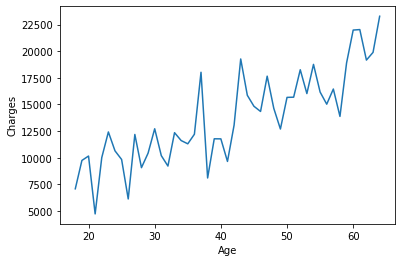

In [86]:
sns.lineplot(x="Age", y="Charges",data=dfplot)

*As demonstrated in the lineplot above we can see a correlation between an older age and higher charges. What I find quite interesting is the discrepancies between single years; as in years like 37-38 where the average cost goes from over 18000 to just 8000. Although, we can clearly see that the overall trend is in fact increasing.*

---

Lastly, we want to see if BMI relates to the charges the same way age does. I will use a linear regression model to portray this.

,Age,BMI,Children,Charges
Body Shape,,,,
Under Weight,25.866667,17.346667,1.066667,7575.866667
Normal Weight,36.190083,21.181818,0.983471,9773.297521
Over Weight,39.245968,25.116935,1.096774,11005.411290
Class 1 Obesity,38.333333,29.484300,1.094203,12489.173913
Class 3 Obesity,41.259804,40.461275,1.122549,15680.705882
Class 2 Obesity,40.690476,34.269940,1.119048,15953.077381


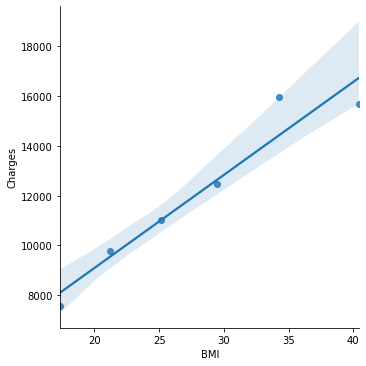

In [48]:
dfplot2=df.groupby(by=["Body Shape"]).mean()
sns.lmplot(x="BMI", y="Charges", data=dfplot2)
dfplot2.sort_values(by="Charges")

**After a thorough analysis we can conclude that age and BMI are the most reliable variables that correlate with higher charges. It's quite interesting to see that underweight individuals actually get lower medical costs than normal weight people, as it could be expected the charges increase due to health concerns similarly to the reason they increase for overweight individuals. This, on average, is not the case as we can see.**

---
As we have moved along, another question that has sparked my interest is **if sex is a determinant in medical costs.** My prediction for this would be that men generally have to spend more than women just based off my knowledge of car insurance costs for men generally being higher. To do this, I think I will use a box plot so I can see several elements of each gender's charges.

<AxesSubplot:xlabel='Sex', ylabel='Charges'>

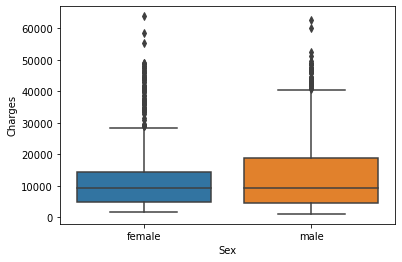

In [59]:
sns.boxplot(x='Sex', y='Charges', data=df)

**As predicted, although the median is about the same, we can clearly see the Q3 quartile is much larger for men and the maximum also reaches ~40000 as opposed to women's ~30000. Interestingly, though, we can see that the max charge outlier is actually a woman. Altogether, it seems if you are an older overweight male, you are subject to the likes of some of the highest medical charges. This also goes for older overweight woman as well, although not quite as high. This fits very well with what we would predict the outcome to be.**

---